# Introduction



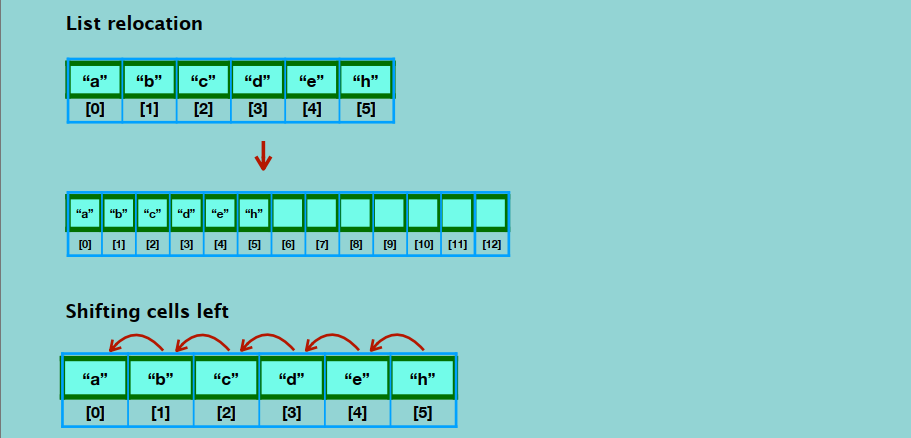

**Problems with Queue without fixed capacity (List Implementation)**

In a Queue (Implemented using List) without a fixed capacity, we can insert as many elements in the queue, but once the List's default capacity is reached, insertion becomes very time-consuming (i.e, O(N)` or O(N^2)`).
* When the list reaches its current capacity and you try to append or insert a new element:
    * Python **allocates a new, larger block of memory**.
    * It **copies the existing elements to the new memory location**.
    * Then it **adds the new element**.
* This **resizing is automatic and handled internally**, so you don’t get an error or need to manage it manually.
* This results in performance leaks/overhead.

Similarly, when we remove the first element from the list, all the rest of the elements have to shift one step left, and this is also a very time-consuming operation.

**Solution**: 
* To solve these problems, we have another option, which is to **create a circular list using a fixed-size list**.
* In this case, the problem of **reallocating a new list as the size grows** (in case of appending a new element) and **shifting elements to the left** (in case of removing the first element) is solved.
* By using a fixed capacity Queue, we can create a circular queue that performs very fast.

# Queue with fixed capacity (Circular Queue)

## Create Circular Queue

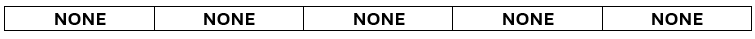

```python
size = 5
start = -1
top = -1
```

* Create a blank list of fixed size with two variables: `top = -1` & `start = -1`.
* In Python, to create a blank list of fixed size, we need to set all elements of the list to `None`.
* Here, we have created an **empty queue** of **size=5** and set all elements to `None`.


## Enqueue and Dequeue Methods

**enqueue(5)**

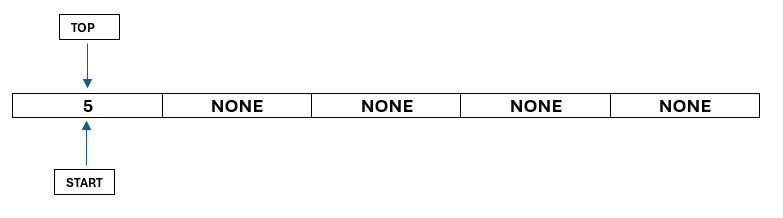

```python
start = 0
top = 0
```
* When we enqueue the first element to an empty queue (`start = top = -1`), we need to update the `start` and `top` variables to `0`.
* From next element onwards, **enqueue** operation only updates the `top` variable.

---

**enqueue(6)**

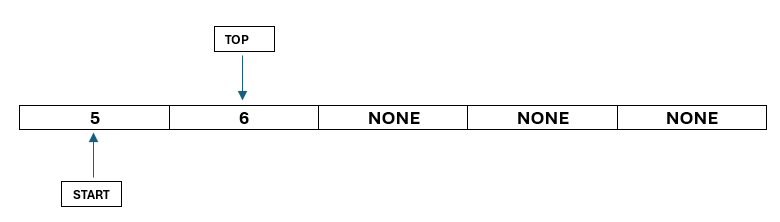

```python
start = 0
top = 1
```

---

**enqueue(7)**

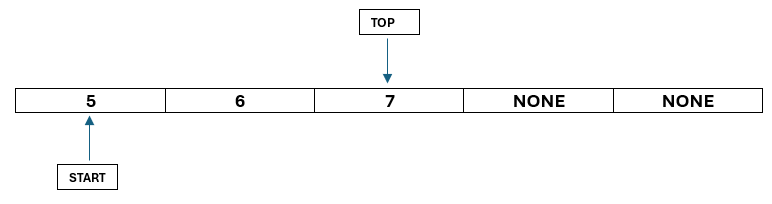

```python
start = 0
top = 2
```

---

**enqueue(8)**

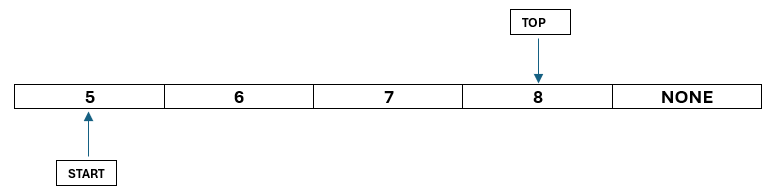

```python
start = 0
top = 3
```

---

**enqueue(9)**

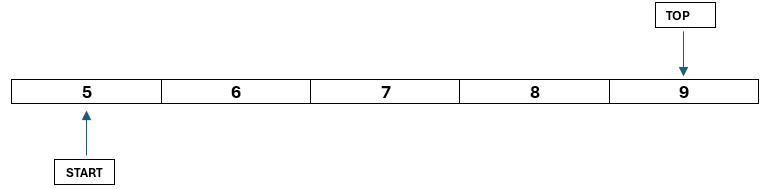

```python
start = 0
top = 4
```

---

**dequeue()**

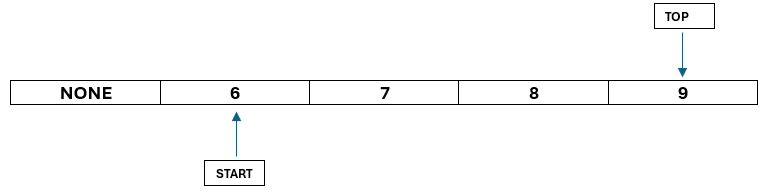

```python
return 5
start = 1
top = 4
```

---

**dequeue()**

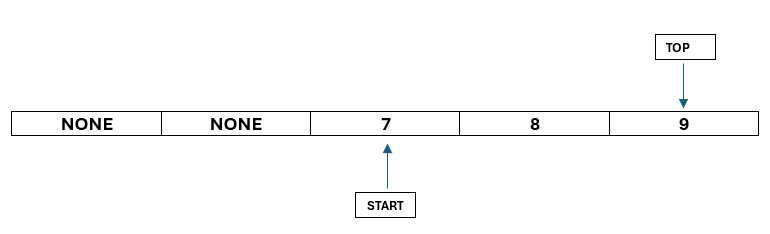

```python
return 6
start = 2
top = 4
```

---

**enqueue(1)**

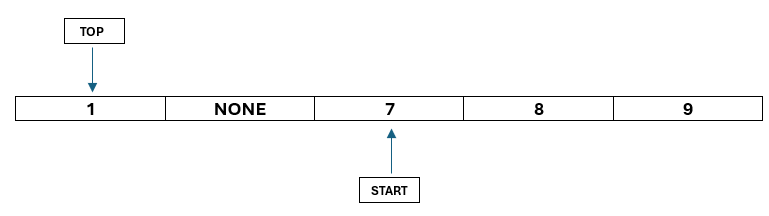

```python
start = 2
top = 0
```

---

**enqueue(2)**

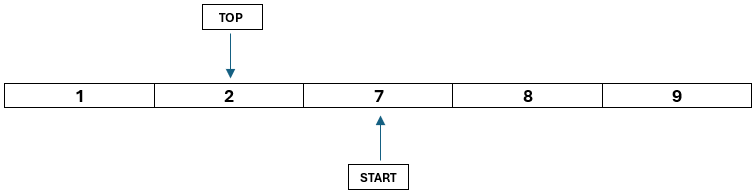

```python
start = 2
top = 1
```

> Note: At this stage, our queue is FULL. That is, no cell with `None` value.

---

**isFull()**

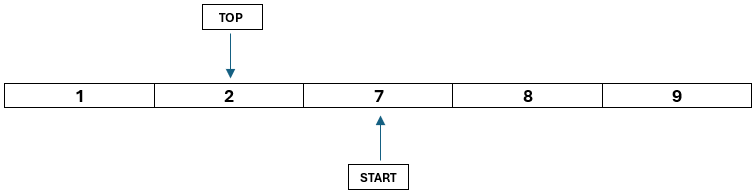

```python
Returns True
start = 2
top = 1
```

---

**peek()**

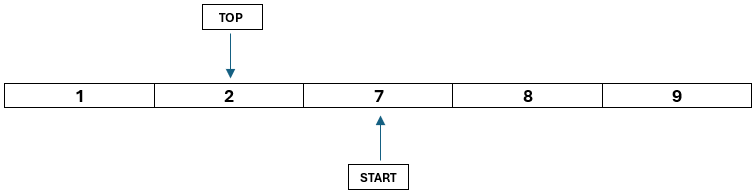

```python
Returns 7
start = 2
top = 1
```

---

**isEmpty()**

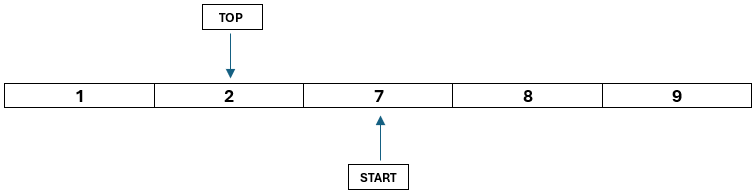

```python
Returns False
start = 2
top = 1
```

> Note: At this stage, our queue is Empty. That is, `top` & `start` both are `-1`.

---

**delete()**

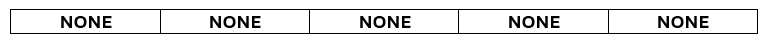

```python
start = -1
top = -1
```

---

**isEmpty()**

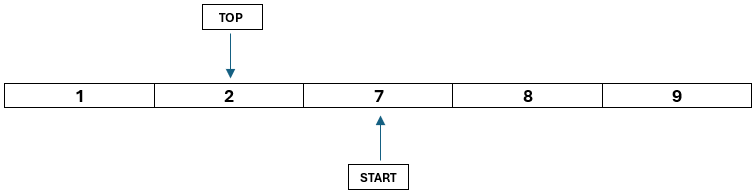

```python
Returns True
start = -1
top = -1
```

> Note: At this stage, our queue is Empty. That is, `top` & `start` both are `-1`.

# Queue implementation with fixed capacity (Circular Queue)

In [27]:
class Queue:
    def __init__(self, maxSize):
        self.items = maxSize * [None]
        self.maxSize = maxSize
        self.start = -1
        self.top = -1 
    
    def __str__(self):
        print("QUEUE REPRESENTATION:\n")
        if self.isEmpty():
            return "[]"
        values = [str(x) for x in self.items]
        return ' '.join(values)
    
    def size(self):
        count = 0
        for i in range(self.maxSize):
            if self.items[i]:
                count += 1
        return count
    
    def isFull(self):
        if self.top + 1 == self.start:
            return True
        elif self.start == 0 and self.top + 1 == self.maxSize:
            return True
        else:
            return False
    
    def isEmpty(self):
        if self.top == -1:
            return True
        else:
            return False
    
    def enqueue(self, value):
        if self.isFull():
            return "The queue is full"
        else:
            if self.top + 1 == self.maxSize:
                self.top = 0
            else:
                self.top += 1
                if self.start == -1:
                    self.start = 0
            self.items[self.top] = value
    
    def dequeue(self):
        if self.isEmpty():
            return "[]"
        else:
            firstElement = self.items[self.start]
            start = self.start
            if self.start == self.top:
                self.start = -1
                self.top = -1
            elif self.start + 1 == self.maxSize:
                self.start = 0
            else:
                self.start += 1
            self.items[start] = None
            return firstElement
    
    def peek(self):
        if self.isEmpty():
            return "[]"
        else:
            return self.items[self.start]
    
    def delete(self):
        self.items = self.maxSize * [None]
        self.top = -1
        self.start = -1

customQueue = Queue(3)
print(customQueue, "\n")

customQueue.enqueue(1)
customQueue.enqueue(2)
customQueue.enqueue(3)
print(customQueue, "\n")
print("QUEUE SIZE: {}".format(customQueue.size())) # 3

QUEUE REPRESENTATION:

[] 

QUEUE REPRESENTATION:

1 2 3 

QUEUE SIZE: 3


In [28]:
print("PEEK: {}".format(customQueue.peek()))     # 10
print(customQueue, "\n")

PEEK: 1
QUEUE REPRESENTATION:

1 2 3 



In [29]:
print("POP: {}".format(customQueue.dequeue()))
print(customQueue, "\n")

POP: 1
QUEUE REPRESENTATION:

None 2 3 



In [30]:
print("PEEK: {}".format(customQueue.peek()))     # 9
print(customQueue, "\n")

PEEK: 2
QUEUE REPRESENTATION:

None 2 3 



In [31]:
print("IS EMPTY: {}".format(customQueue.isEmpty())) # False
print("QUEUE SIZE: {}".format(customQueue.size())) # 2

IS EMPTY: False
QUEUE SIZE: 2


In [32]:
customQueue.delete()
print(customQueue, "\n")

QUEUE REPRESENTATION:

[] 



In [33]:
print("IS EMPTY: {}".format(customQueue.isEmpty())) # True

IS EMPTY: True


# Time and Space complexity of Circular Queue operations

| Operations | Time Complexity | Space Complexity |
| -- | -- | -- |
| Create Queue | `O(1)` | `O(1)` |
| Enqueue | `O(n)` | `O(1)` |
| Dequeue | `O(n)` | `O(1)` |
| Peek | `O(1)` | `O(1)` |
| IsEmpty | `O(1)` | `O(1)` |
| IsFull | `O(1)` | `O(1)` |
| Delete entire queue | `O(1)` | `O(1)` |